#  Porto Seguro’s Safe Driver Prediction 필사
출처 : https://www.kaggle.com/code/bertcarremans/data-preparation-exploration/notebook

# 소개
이 노트북은 proteseguro competition을 위한 데이터의 좋은 통찰력을 얻는 것을 목적으로 한다.
외에도, 몇 가지 팁을 줄 것이며 당신의 모델을 위한 데이터를 준비하기위한 팁 역시 줄 것이다.
이 노트북은 다음과 같은 메인 섹션(파트)이 준비되어있다.
1. 당신의 데이터에 대한 시각적 직관
2. 메타데이터의 정의
3. 기술적 통계
4. 불균형 데이터를 다루기
5. 데이터 품질 체크
6. 탐색적 데이터 시각화
7. 피쳐 엔지니어링
8. 피쳐 선택
9. 피쳐 스케일링

# loading packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#from sklearn.preprocessing import Imputer #버전이 바뀌면서 아래와 같은 코드로 대체
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
pd.set_option("display.max_columns", 100)

# loading data

In [2]:
train = pd.read_csv("aiffel/kaggle_nlp/train.csv")
test = pd.read_csv("aiffel/kaggle_nlp/test.csv")

# 첫 눈에 들어오는 데이터

대회를 위해 데이터 묘사를 발췌했다
- 피쳐들은 비슷한 태그로 그룹화 되어있다.(ind, reg, car, calc등)
- 피쳐네임에서 접미사 bin은 이진피쳐, cat은 카테고리컬 피쳐를 나타낸다
- 이러한 명칭이 없는 특징들은 연속적이거나 ordinal(순서수)이다.
- -1의 값은 관측되지 않은 값
- 타겟columns는 보험계약자가 claim하였는지 아닌지를 signify(의미하다)

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


우리는 다음의 것들을 볼 수 있다.
- 이진변수
- 카테고리 값에 대한 범주형 변수는 정수이다.
- 다른 변수들은 정수이거나 실수이다.
- 변수중 -1은 missing value를 의미한다.
- 타겟 변수와 id 변수

In [5]:
train.shape

(595212, 59)

59개 columns, 595212개의 행이 있다.

In [6]:
train.drop_duplicates()
train.shape

(595212, 59)

중복이 존재하지 않는다

In [7]:
test.shape

(892816, 58)

우리는 한가지의 변수를 놓쳤다(59, 58말하는듯). 그러나 이것은 타겟변수이므로 문제없다.
우리가 가지고 있는 각 타입의 변수가 얼마나 되는지 보자.

이후 우리는 14개 범주형 변수에대해  dummy variables를 만들것이다.
bin(이진)변수는 이미 이진화되어있고, dummification이 필요없다

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

모든 컬럼이 정수이거나 실수인것을 볼 수 있다.
null data는 이 데이터셋에 존재하지않는다. 왜냐하면 -1로 대체되었기 때문이다.


# meta data
데이터 관리를 가능하게 하기 위해서 우리는 데이터프레임에서 변수에 관한 메타정보들을 저장할 것이다. 이것은 우리가 특별히 분석, 시각화, 모델링 등을 선택할 때 유용할 것이다.
구체적으로 우리는 저장할 것이다:
- role : input, id, target
- level: nominal, interval, ordinal, binary
- keep : True or False
- dtype : int, float, str

In [9]:
data = []
for f in train.columns:
    #role을 정의 - target, id , input
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
        
    #level을 정의
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
        
    #id를 제외한 모든 변수들에대해 keep을 true로 초기화한다.
    keep = True
    if f == 'id':
        keep = False
        
    #데이터타입 정의
    dtype = train[f].dtype
    
    #변수들을 위해 모든 메타데이터를 포함하는 딕셔너리를 만든다
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
                
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [10]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


드롭되지 않은 모든 nominal 변수들을 추출하는 예시

In [11]:
meta[(meta.level =="nominal") & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

아래는 displayed된 role과 level의 변수의 수이다

In [12]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])
              ['role'].size()}).reset_index()
#reset_index는 기존의 인덱스대신 새로 0 1 2 등의 값을 가지며, 
#인자를 drop=True로 입력할 경우 기존 인덱스는 제거된다.
#groupby(1)[2] 등으로 사용하는데 (1)을 기준으로 묶고 [2]의 값을 가져온다. 
#와 같이 사용

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


In [13]:
pd.DataFrame(meta.groupby(['role', 'level'])['role'])

,0,1
0,"(id, nominal)","varname id id Name: role, dtype: object"
1,"(input, binary)",varname ps_ind_06_bin input ps_ind_07_bin ...
2,"(input, interval)",varname ps_reg_01 input ps_reg_02 inpu...
3,"(input, nominal)",varname ps_ind_02_cat input ps_ind_04_cat ...
4,"(input, ordinal)",varname ps_ind_01 input ps_ind_03 inpu...
5,"(target, binary)","varname target target Name: role, dtype: ob..."


In [14]:
pd.DataFrame(meta.groupby(['role', 'level']))

,0,1
0,"(id, nominal)",role level keep dtype varname ...
1,"(input, binary)",role level keep dtype var...
2,"(input, interval)",role level keep dtype var...
3,"(input, nominal)",role level keep dtype var...
4,"(input, ordinal)",role level keep dtype varnam...
5,"(target, binary)",role level keep dtype varname ...


In [15]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])
              ['role'].size()})

count
role   level          
id     nominal       1
input  binary       17
       interval     10
       nominal      14
       ordinal      16
target binary        1

# Descriptive statistics(기술적통계)
데이터프레임에서 우리는 묘사방법을 적용할 수 있다.
그러나, 범주형 변수와 id변수에서 평균 표준편차를 계산할 때 make sense to(이해하다) 이해되지않는다.
우리는 추후에 범주형 변수를 시각적으로 탐색할 것이다

# interval variables(간격변수?)

In [16]:
v = meta[(meta.level == "interval") & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


# reg variables
- 오직 ps_reg_03만이 missing value를 가짐
- 변수간 min max간 거리에 차이가 있다. 스케일링을 해야한다. 하지만 우리가 사용하기 원하는 분류기?(classifier)에 의존한다

# car variables
- car_12, car_15가 missing value를 갖는다
- 위와같이 각자의 범위가 다르므로 스케일링이 필요하다

# calc variables
- missing value 없음
- 0.9의 맥시멈값을 가지는 것으로 보임.(비율같음)
- 모든 세가지의 _calc는 비슷한 분포를 가짐

전반적으로 우리는 간격변수가 꽤 작다는 것을 볼 수 있다. 아마 어떤 변화는 데이터 익명화를 위해 이미 적용된 것으로 보인다.

# Ordinal variables

In [17]:
v = meta[(meta.level =="ordinal") & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


- ps_car_11에서 오직 하나의 missing variable이 있다
- 우리는 다른 범위를 다루기 위해서 스케일링을 적용할 수 있다

# binary variables

In [18]:
v= meta[(meta.level =="binary") & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- (target mean 말함)train data에서 선형은 3.645%로 강한 불균형이 있다.
- 평균으로부터 우리는 대부분의 케이스에서 변수의 값이 0이라고 결론지을 수 있다.

# 불균형 class 다루기

언급했듯이, 타겟=1인 비율이 타겟=0에 비해 엄청나게 적다.
이러한 상황은 모델이 훌륭한 정확성을 이끌 것이나, 실제로는 추가적인 값이 있다(정확도가 높지만 타겟=1인 값을 제대로 못맞출 경우를 말하는듯)
이 두 문제를 다루기 위해서는 두가지 전략이 필요하다.
- target=1을 오버샘플링한다
- target=0을 언더샘플링한다

많은 전략이 있다. 그리고 MachineLearningMastery.com에서 좋은 overview를 준다.
우리는 다소 큰 훈련세트를 가지고 있기때문에 언더샘플링을 하겠다

In [19]:
#apriori  = 선험적으로
#여기서는 언더샘플링 비율 지정을 위해 사용한듯
desired_apriori = 0.10

# 목표값당 인덱스 가져오기
idx_0 = train[train.target==0].index
idx_1 = train[train.target==1].index

# 대상값 당 원래 레코드 수를 가져오기
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# 언더샘플링 비율 계산과 타겟=0인 결과 레코드의 수
# undersampling_rate = (0.9 * nb_1) / (nb_0 * 0.1)
# ??? 분자는 0.9를 곱해줄 필요없이 그대로 사용하고, 분모만 곱해주면 됐을텐데 왜?
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('타겟=0을 언더샘플링한 비율: {}'.format(undersampling_rate))
print('타겟=0을 언더샘플링한 이후의 값: {}'.format(undersampled_nb_0))

# 목표가 0인 레코드를 무작위로 선택하여 사전에 원하는 결과를 얻는다.
# shuffle에서 n_samples가 입력배열보다 크지 말아야 한다는 것으로 볼 때
# 수를 조정하는 방법으로 사용하는 것 같음
undersampled_idx = shuffle(idx_0, random_state = 37, n_samples=undersampled_nb_0)

# 남은 인덱스의 리스트를 생성
idx_list = list(undersampled_idx) + list(idx_1)

# 언더샘플링 데이터프레임 리턴
train = train.loc[idx_list].reset_index(drop = True)

타겟=0을 언더샘플링한 비율: 0.34043569687437886
타겟=0을 언더샘플링한 이후의 값: 195246


# 데이터 퀄리티 체크

### missing value 체크
missing은 -1로 나타난다

In [20]:
vars_with_missing = []

for f in train.columns:
    # train[train[f] == -1].count()만 쓰면 모든 columns에 대한 -1이 포함된 카운트가 출력
    #마지막에 [f]를 붙여줌으로써 특정 부분만 선택하도록 한듯
    missings = train[train[f] == -1][f].count()
    if missings >0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print("변수 {}는 {}개의 records를 가지고있다. missing_value의 퍼센트는 ({:.2%})".format(f, missings, missings_perc))
        
        print("전체 {}개의 미싱밸류가 있다".format(len(vars_with_missing)))

변수 ps_ind_02_cat는 103개의 records를 가지고있다. missing_value의 퍼센트는 (0.05%)
전체 1개의 미싱밸류가 있다
변수 ps_ind_04_cat는 51개의 records를 가지고있다. missing_value의 퍼센트는 (0.02%)
전체 2개의 미싱밸류가 있다
변수 ps_ind_05_cat는 2256개의 records를 가지고있다. missing_value의 퍼센트는 (1.04%)
전체 3개의 미싱밸류가 있다
변수 ps_reg_03는 38580개의 records를 가지고있다. missing_value의 퍼센트는 (17.78%)
전체 4개의 미싱밸류가 있다
변수 ps_car_01_cat는 62개의 records를 가지고있다. missing_value의 퍼센트는 (0.03%)
전체 5개의 미싱밸류가 있다
변수 ps_car_02_cat는 2개의 records를 가지고있다. missing_value의 퍼센트는 (0.00%)
전체 6개의 미싱밸류가 있다
변수 ps_car_03_cat는 148367개의 records를 가지고있다. missing_value의 퍼센트는 (68.39%)
전체 7개의 미싱밸류가 있다
변수 ps_car_05_cat는 96026개의 records를 가지고있다. missing_value의 퍼센트는 (44.26%)
전체 8개의 미싱밸류가 있다
변수 ps_car_07_cat는 4431개의 records를 가지고있다. missing_value의 퍼센트는 (2.04%)
전체 9개의 미싱밸류가 있다
변수 ps_car_09_cat는 230개의 records를 가지고있다. missing_value의 퍼센트는 (0.11%)
전체 10개의 미싱밸류가 있다
변수 ps_car_11는 1개의 records를 가지고있다. missing_value의 퍼센트는 (0.00%)
전체 11개의 미싱밸류가 있다
변수 ps_car_14는 15726개의 records를 가지고있다. missing_value의 퍼센트는 (7.25%)
전체 12개의 미싱

- ps_car_03_cat and ps_car_05_cat은 높은 비율의 missing value를 가지고있다. 제거할것
- 결측값이 있는 다른 범주형 변수에 관해서, 결측값1을 그대로 둘 것이다
- ps_reg_03 (연속적) 18%의 결측값을 가지고 있다. 평균으로 대체
- ps_car_11 (순서수 - 4 2 3 1 등의 값을 가진것)는 5개의 결측치가 있음. mode로 대체(밑의 코드를 봤을 때 지금은 사라진 imputer사용. 현재는 simple_imputer로 대체
- ps_car_12 (연속적) 오직 1개의 결측치. 평균으로 대체
- ps_car_14 (연속적) 7%의 결측치를 가짐. 평균으로 대체

In [21]:
#너무 많은 결측치를 가진 값들을 드랍
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False  # 메타 업데이트

#평균이나 mode로 대치
#simpleimputer에서 strategy는 방법. 평균, 중간값, 최빈도값, constant 네가지 존재
mean_imp = SimpleImputer(missing_values=-1, strategy='mean')
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')

# .ravel()은 다차원 리스트를 1차원으로 펴줄때 사용
train['ps_reg_03'] = mean_imp.fit_transform(train[["ps_reg_03"]]).ravel()
train["ps_car_12"] = mean_imp.fit_transform(train[["ps_car_12"]]).ravel()
train["ps_car_14"] = mean_imp.fit_transform(train[["ps_car_14"]]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

원본과달리 imputer가 simpleimputer로 바뀌었을 뿐인데 작동되지 않음.
8,9번째 axis=0을 지정하는 부분을 삭제했더니 정상적으로 동작됨
api 사이트를 찾아보니 axis 입력변수부분이 사라짐

### 범주형 변수의 집합크기(카디널리티) 체크
카디널리티는 변수에 있는 서로 다른 값의 수를 나타낸다.
이후 우리는 dummy variables를 범주형변수로부터 추가할 것이다.
우리는 고유값(distinct values)이 많은 변수가 있는지 확인해야한다
우리는 많은 더미변수를 생성하게 되므로 이러한 변수를 다르게 처리하여야 한다.

In [22]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print("변수 {}는 {} 개의 고유 값을 가진다".format(f,dist_values))

변수 ps_ind_02_cat는 5 개의 고유 값을 가진다
변수 ps_ind_04_cat는 3 개의 고유 값을 가진다
변수 ps_ind_05_cat는 8 개의 고유 값을 가진다
변수 ps_car_01_cat는 13 개의 고유 값을 가진다
변수 ps_car_02_cat는 3 개의 고유 값을 가진다
변수 ps_car_04_cat는 10 개의 고유 값을 가진다
변수 ps_car_06_cat는 18 개의 고유 값을 가진다
변수 ps_car_07_cat는 3 개의 고유 값을 가진다
변수 ps_car_08_cat는 2 개의 고유 값을 가진다
변수 ps_car_09_cat는 6 개의 고유 값을 가진다
변수 ps_car_10_cat는 3 개의 고유 값을 가진다
변수 ps_car_11_cat는 104 개의 고유 값을 가진다


합리적이지만, ps_car_11_cat은 매우 많은 고유값을 가진다.
유출의 우려때문에 작성자의 코드 대신 다른 사람의 코드를 아래에서 가져옴

In [25]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features

# random.randn을 사용하여 0~1사이 정규분포 사이의 난수를 생성
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    '''
    smoothing은 daniele micci-barreca의 다음 논문과 같이 계산된다
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : series로서의 트레이닝 범주형 특징
    tst_series : series로서의 테스트 범주형 특징
    target : series로서의 타겟데이터
    min_samples_leaf (int) : 범주형 평균과 이전의 균형을 맞추기 위한 smoothing 효과
    '''
    
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    #타겟 평균 계산
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # smoothing 계산
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    #모든 타겟데이터에 평균함수 적용
    prior = target.mean()
    #카운트가 클 수록 full_avg가 덜 고려된다.
    averages[target.name] = prior * (1-smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis= 1, inplace = True)
    #trn과 tst시리즈에 평균을 적용
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    #pd.merge는 인덱스를 유지하지않으므로 복원
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    #pd.merge는 인덱스를 유지하지않으므로 복원
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [26]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # meta 업데이트
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

# Exploratory Data Visualization(탐색적 시각화)

### 범주형 변수
범주형변수와 타겟=-1의 값 확인

<Figure size 432x288 with 0 Axes>

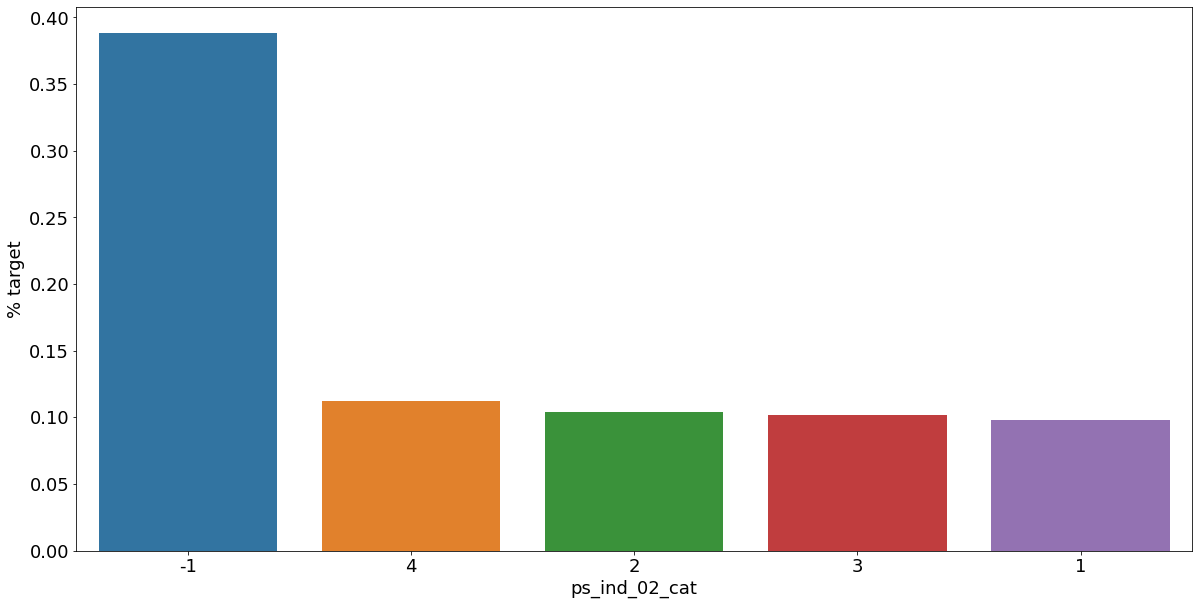

<Figure size 432x288 with 0 Axes>

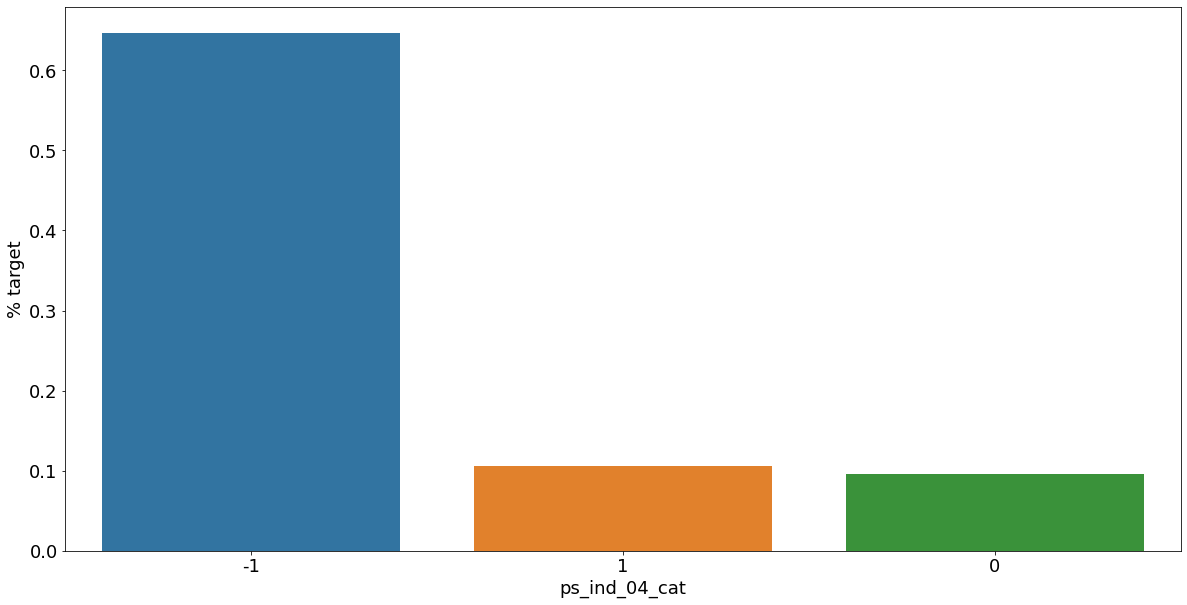

<Figure size 432x288 with 0 Axes>

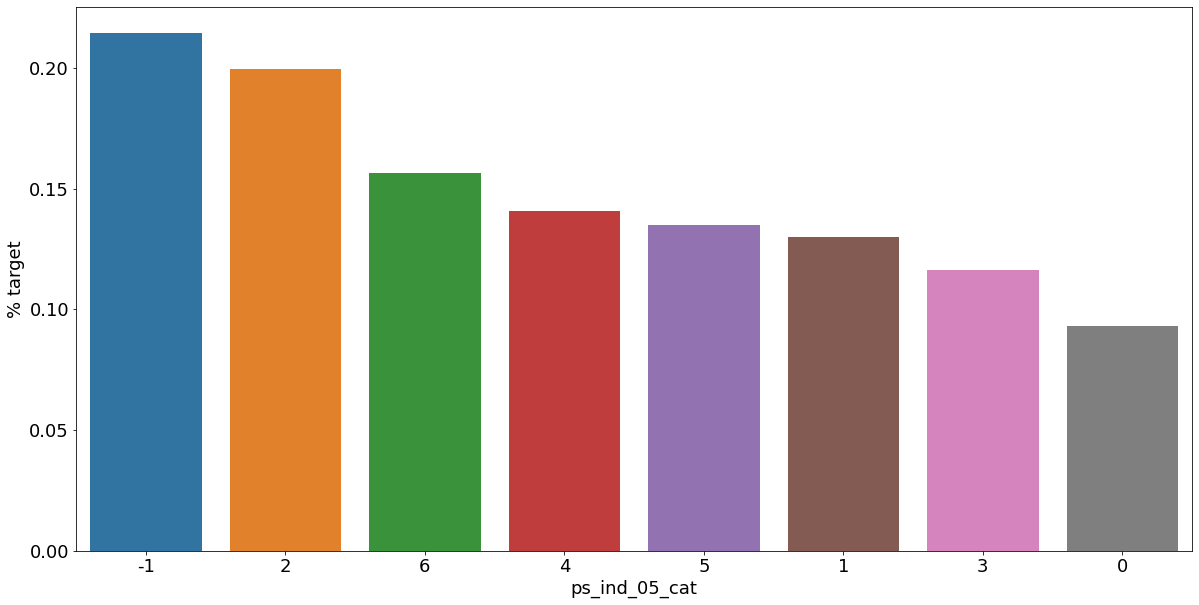

<Figure size 432x288 with 0 Axes>

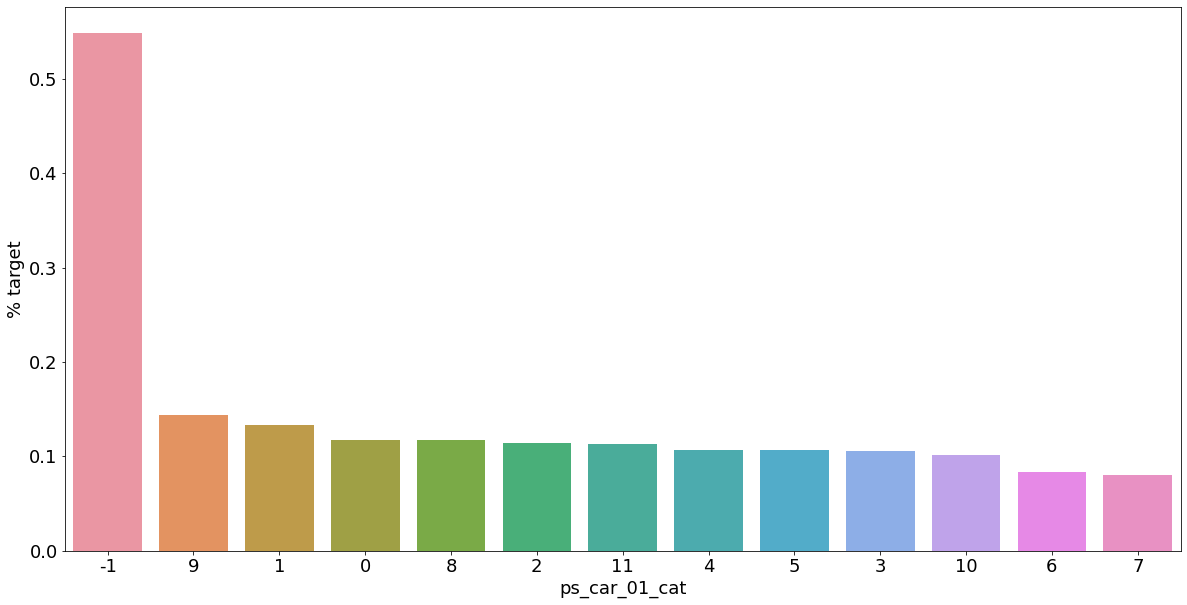

<Figure size 432x288 with 0 Axes>

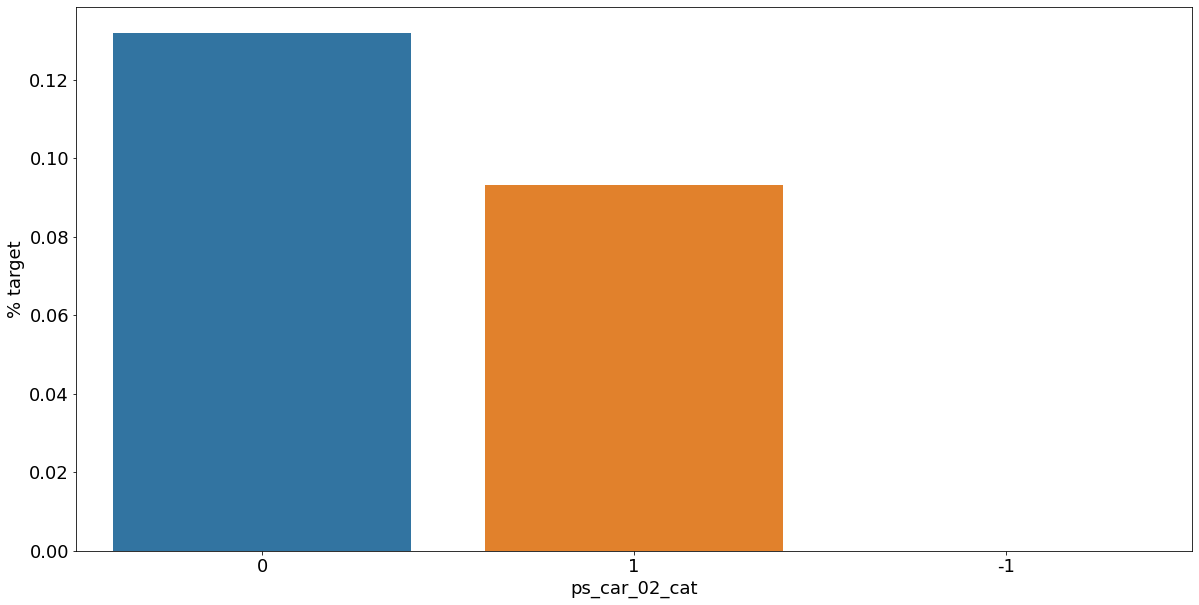

<Figure size 432x288 with 0 Axes>

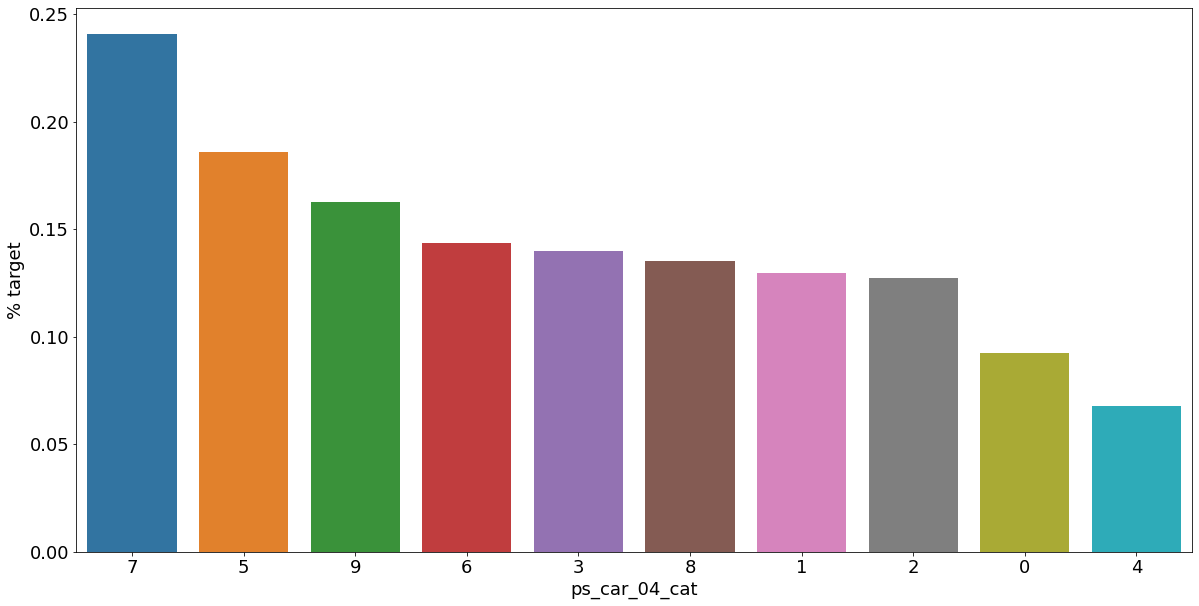

<Figure size 432x288 with 0 Axes>

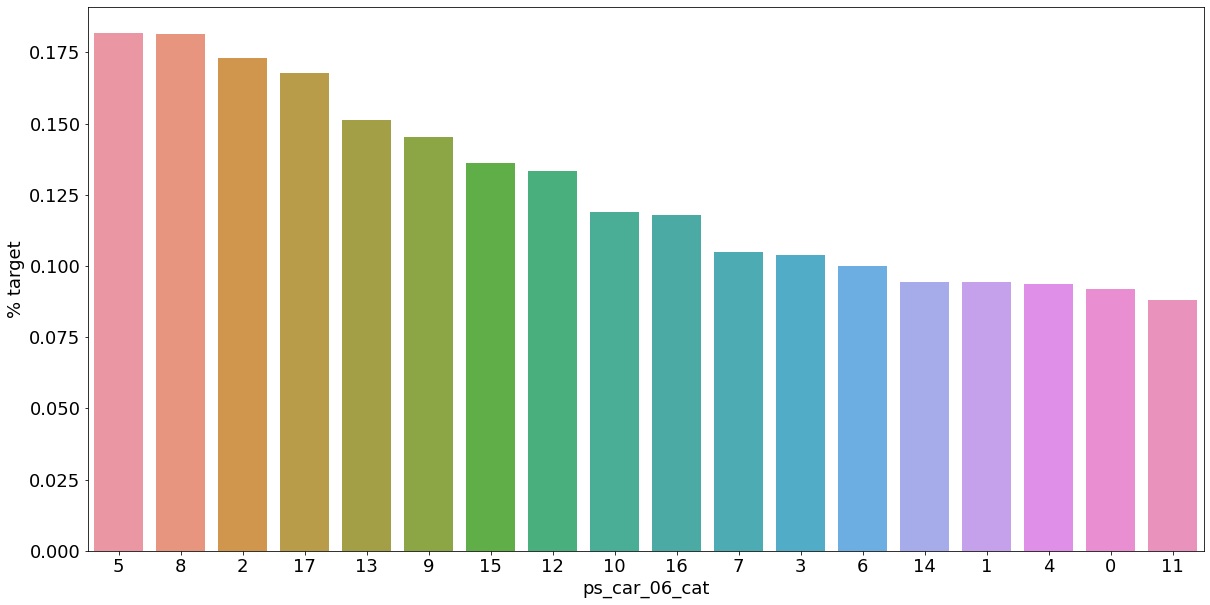

<Figure size 432x288 with 0 Axes>

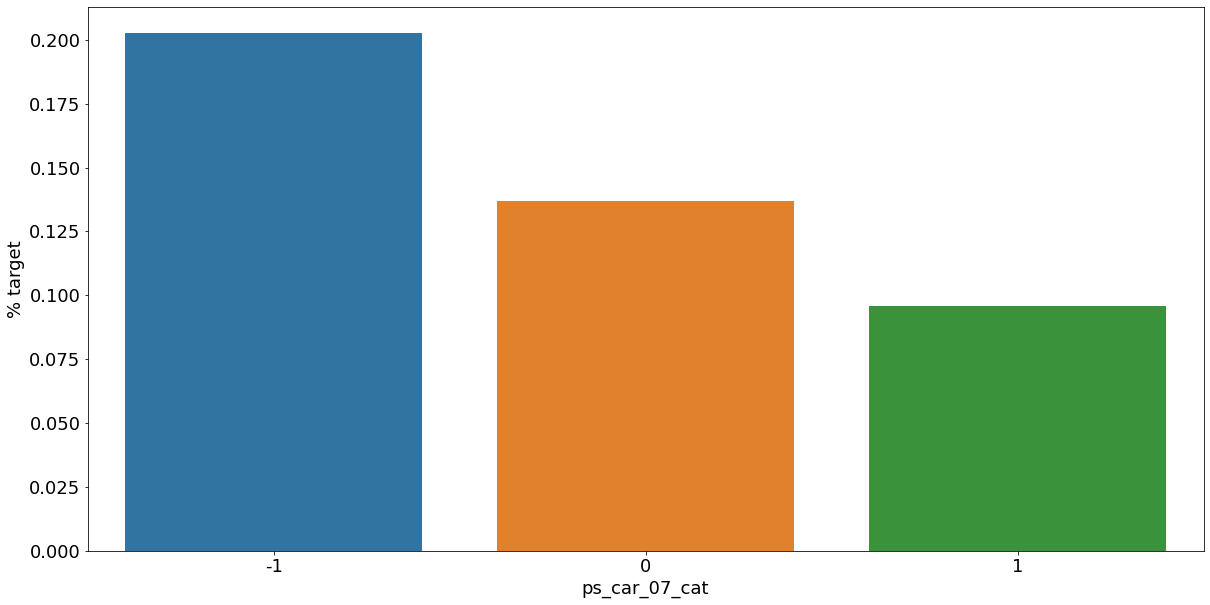

<Figure size 432x288 with 0 Axes>

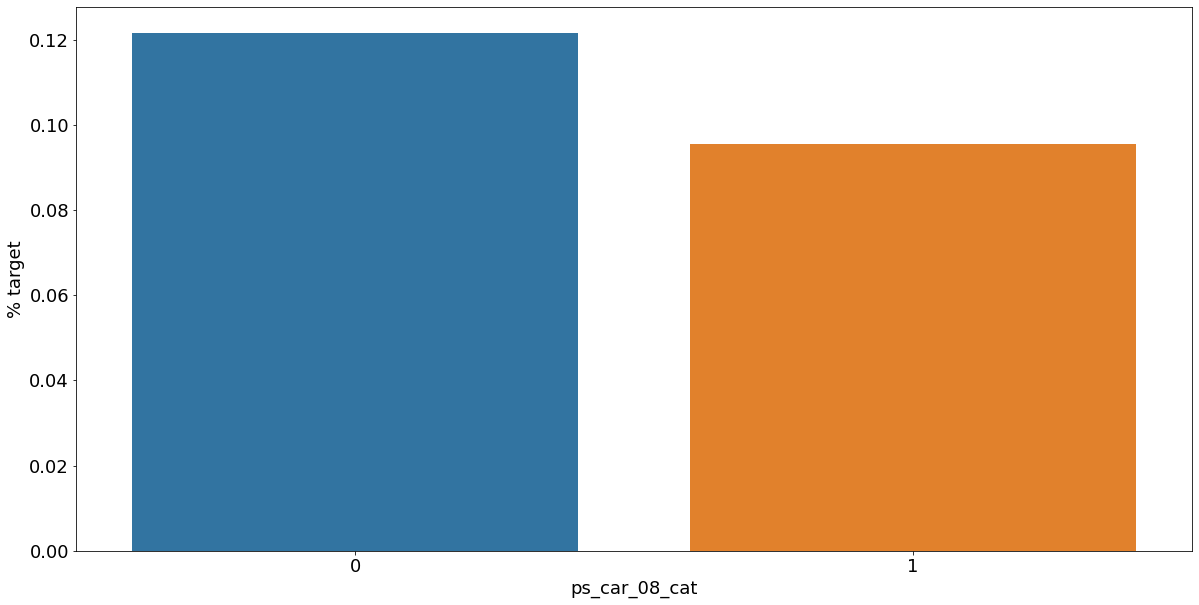

<Figure size 432x288 with 0 Axes>

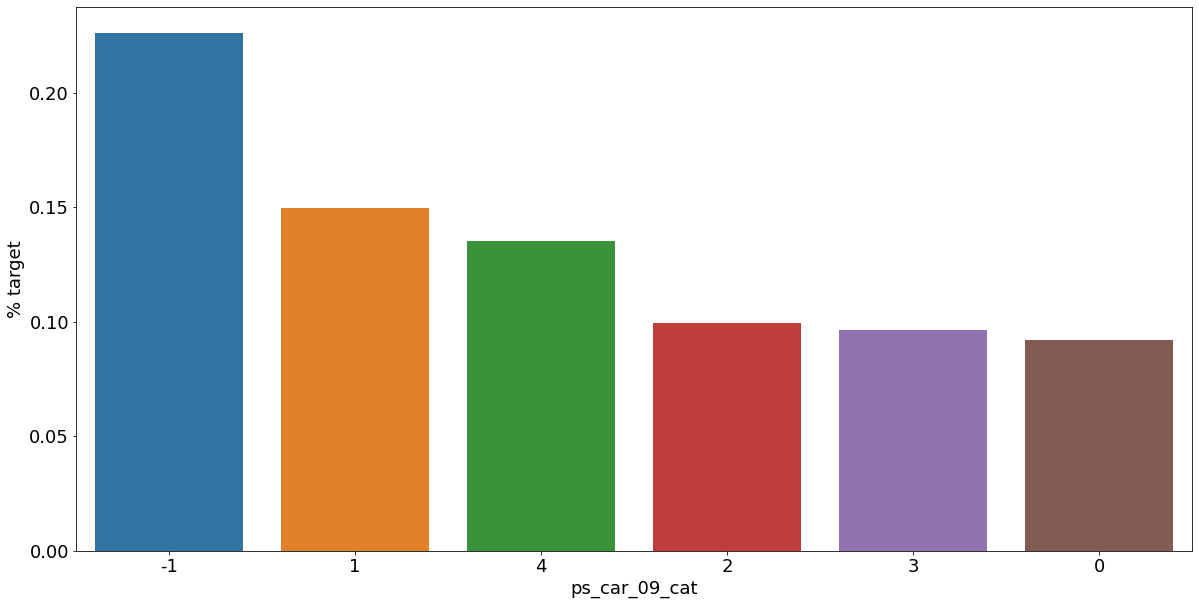

<Figure size 432x288 with 0 Axes>

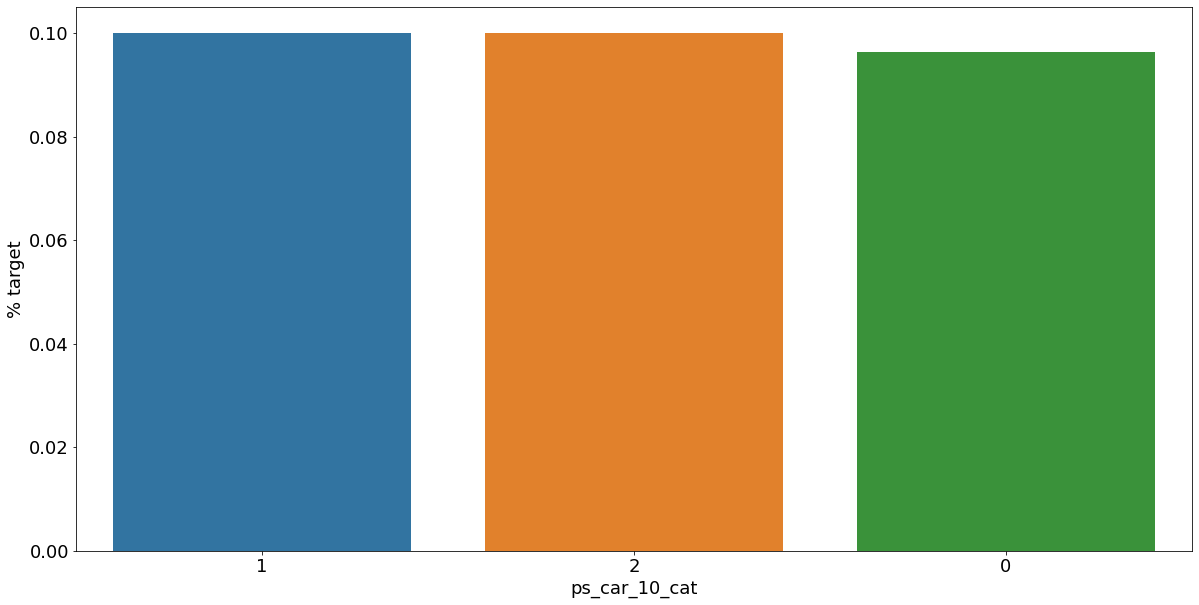

In [31]:
v = meta[(meta.level =="nominal") & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize = (20,10))
    #범주형값 당 타겟=-1의 퍼센트 계산
    cat_perc = train[[f, "target"]].groupby([f], as_index = False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    #바플롯, 타겟평균에따라 bar를 정렬
    sns.barplot(ax=ax, x=f, y="target", data=cat_perc, order=cat_perc[f])
    plt.ylabel("% target", fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis="both", which = "major", labelsize=18)
    plt.show();

결측치를 볼 수 있다. 모드로 교체하는 대신 결측값을 별도의 범주값으로 유지하는 것이 좋다.
결측값이 있는 고객은 보험 청구를 요청할 가능성이 훨씬 더 높은(어떤 경우에는 더 낮음) 이 나타난다.

### 간격변수
간격변수간 상관관계 체킹.
히트맵은 변수들간 상관관계를 시각화하는데 좋다.
아래코드는 michael waskom의 예시를 기초로 하였다

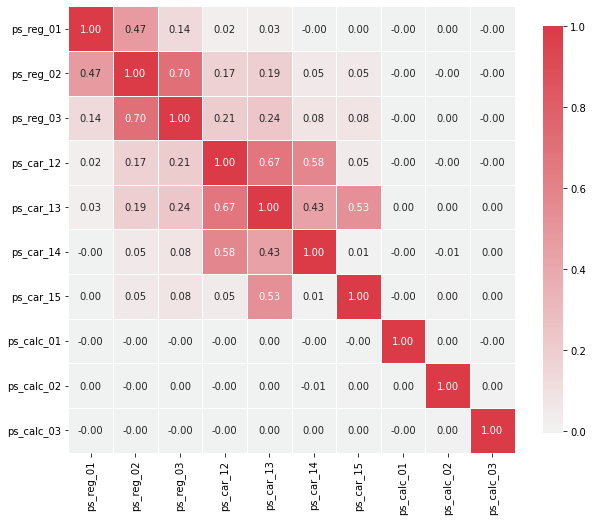

In [33]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    #두 색상사이에 컬러맵의 범위를 생성
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level =="interval") & (meta.keep)].index
corr_heatmap(v)

강한 상관관계를 가지는 것은 다음과 같다
- ps_reg_02 and ps_reg_03 (0.7)
- ps_car_12 and ps_car13 (0.67)
- ps_car_12 and ps_car14 (0.58)
- ps_car_13 and ps_car15 (0.67)

seaborn에는 변수간 관계를 시각화하는 간단한 플롯이 있다.

변수들간의 관계를 시각화하기위해 우리는 pairplot을 사용하는 것이 좋다.

그러나, 히트맵이 이미 제한된 수의 변수를 보여주기때문에 상관관계가 높은 각 변수를 개별적으로 살펴볼 것이다.

note : 프로세스 속도를 높이기 위해 train데이터의 샘플을 가져온다.

In [34]:
s = train.sample(frac=0.1)

### ps_reg_02 and ps_reg_03
회귀선에서 알 수 있듯이 변수들간에는 선형 관계가 있다.  
hue parameter덕분에 타겟0 타겟1에 대한 회귀선이 동일함을 알 수 있다

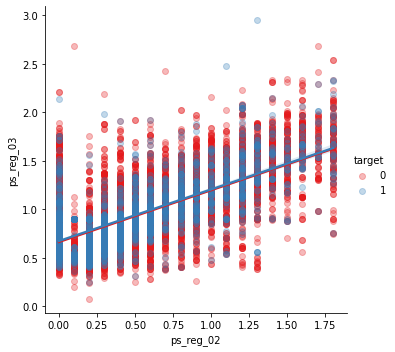

In [37]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

### ps_car_12 and ps_car_13


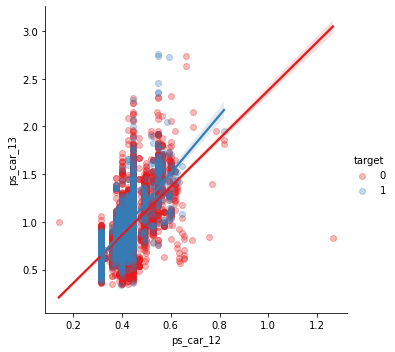

In [38]:
sns.lmplot(x="ps_car_12", y="ps_car_13", data=s, hue="target", palette="Set1", scatter_kws={"alpha" :0.3})
plt.show()

### ps_car_12 and ps_car_14

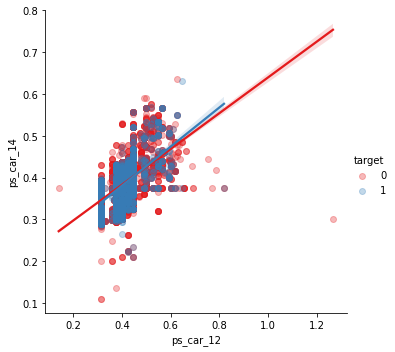

In [39]:
sns.lmplot(x="ps_car_12", y="ps_car_14", data=s, hue="target", palette="Set1", scatter_kws={"alpha":0.3})
plt.show()

### ps_car_13 and ps_car_15

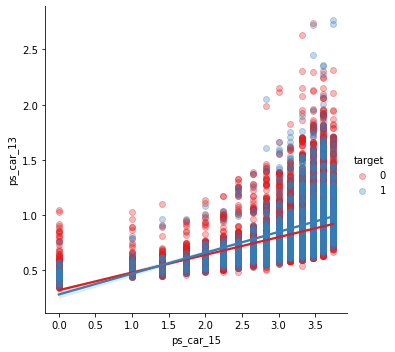

In [40]:
sns.lmplot(x="ps_car_15", y="ps_car_13", data=s, hue = "target", palette="Set1", scatter_kws={"alpha":0.3})
plt.show()

어떤 상관변수를 유지할 것인지 어떻게 결정할것인가?
주성분 분석(pca)를 사용할 수 있다.
allstate claims severity competition을위해 이 커널을 만들었다. 
상관변수의 수가 적기 때문에 무거운 작업을 수행할 것이다

### ordinal(순서수)간의 상관관계 체크

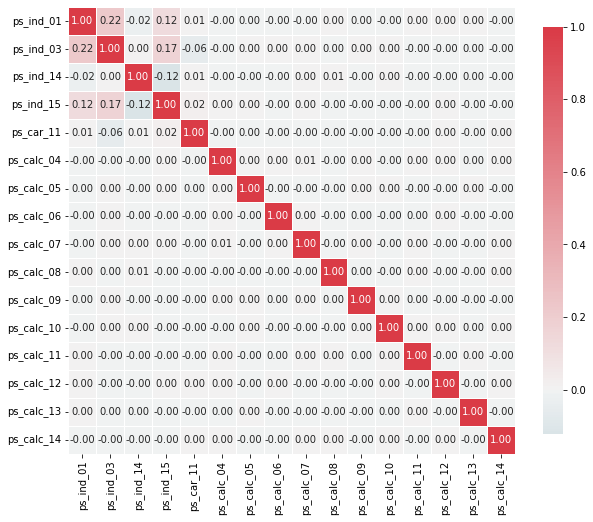

In [41]:
v = meta[(meta.level =="ordinal") & (meta.keep)].index
corr_heatmap(v)

순서수에서 우리는 많은 상관관계를 보지 못했다.
다른 방법으로 그룹화할때 분포가 어떻게 될지 확인할 수 있다

# Feature engineering

dummy 변수 만들기(원핫인코딩)
범주형 변수의 값은 순서나 크기를 나타내지 않는다.
예를들어, 카테고리2는 카테고리1에비해 2배의 차이가 나지않는다. 따라서 우리는 값을 다루기 위해서 더미변수를 만든다.
원래 변수의 범주에서 생성된 더미변수에서 파생될 수 있으므로 첫번째 더미변수를 삭제한다

In [42]:
v = meta[(meta.level =="nominal") & (meta.keep)].index
print("더미화하기 이전 우리는 {} 개의 변수를 가진다- train에서".format(train.shape[1]))
train = pd.get_dummies(train, columns= v, drop_first = True)
print("더미화하기 이후 우리는 {} 개의 변수를 가진다 -train에서".format(train.shape[1]))

더미화하기 이전 우리는 57 개의 변수를 가진다- train에서
더미화하기 이후 우리는 109 개의 변수를 가진다 -train에서


트레이닝 셋에서 52개의 더미변수를 생성하였다.
### 상관변수 생성

In [44]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
#polynomialfeatures = 다항회귀 사용
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
#오리지널 컬럼 제거
interactions.drop(v, axis=1, inplace=True)
#train data와 interaction 변수를 concat한다
print('train에서 interactions를 만들기전 {} 개의 변수를 가진다'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('train에서 interactions를 만들고 난 이후 {} 개의 변수를 가진다'.format(train.shape[1]))

train에서 interactions를 만들기전 109 개의 변수를 가진다
train에서 interactions를 만들고 난 이후 164 개의 변수를 가진다


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


train data에서 추가로 interaction 변수를 더하였다.
get_feature_names 메서드 덕분에 새 변수에 열 이름을 할당할 수 있다.

# feature 선택

### 분산이 낮거나 0인 값 제거

개인적으로는 분류 알고리즘이 어떤 피쳐를 남길지 선택하게 하는것을 선호한다.
그러나 스스로 해야한다.
sklearn에는 편리한 방법이 있다.
varianceThreshold(차이임계값) 기본적으로 분산이 0인 기능을 제거한다.
이전단계에서 0분산변수가 없는 것을 보았기 때문에 적용할 수 없다.
그러나, 분산이 1%미만인 기능을 제거하면 31개의 변수가 제거된다

In [45]:
selector = VarianceThreshold(threshold = .01)
selector.fit(train.drop(["id", "target"], axis = 1))
#id와 타겟값없이 훈련

f = np.vectorize(lambda x : not x)
#불리언 배열 요소를 전화하는 기능

v = train.drop(["id", "target"], axis = 1).columns[f(selector.get_support())]
print("{} 변수는 너무 낮은 분산을 가진다".format(len(v)))
print("변수들은 {}이다".format(list(v)))

28 변수는 너무 낮은 분산을 가진다
변수들은 ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']이다


분산을 기반으로 선택할 경우 많은 변수를 잃게 된다.
하지만 변수가 많지 않기 때문에 분류기가 선택하도록 할 것이다.
더 많은 변수가 있는 데이터셋의 경우 처리시간을 줄일 수 있다..

sklearn에는 다른 방법도 있다. 
방법 중 하나는 다른 분류기가 최상의 기능을 선택하고 계속하도록 하는 selectfrommodel이다
아래에서 랜덤포레스트와 사용하는 방법을 가르쳐줄 것이다

### 랜덤포레스트와 selectfrommodel로 피쳐선택

우리는 랜덤포레스트의 중요도 기반으로 피쳐를 선택할 것이다
사이킷런의 SelectFromModel 을 통해 유지할 변수들을 고를 수 있다.
기능 중요도에 대한 임계값(threshold)를 수동으로 설정할 수 있지만, 우리는 50%의 최고의 변수를 설정할 것이다

아래의 코드는 GitHub repo of Sebastian Raschka.에서 참고하였다.
이 레포지토리는 반드시 읽어야하는 그의 책 python machine learning의 코드샘플이 포함되어있다

In [47]:
X_train = train.drop(["id", "target"], axis= 1)
y_train = train["target"]

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.021219
 2) ps_car_13                      0.017371
 3) ps_car_12 ps_car_13            0.017301
 4) ps_car_13^2                    0.017227
 5) ps_car_13 ps_car_14            0.017165
 6) ps_reg_03 ps_car_13            0.017073
 7) ps_car_13 ps_car_15            0.016856
 8) ps_reg_01 ps_car_13            0.016752
 9) ps_reg_03 ps_car_14            0.016245
10) ps_reg_03 ps_car_12            0.015557
11) ps_reg_03 ps_car_15            0.015127
12) ps_car_14 ps_car_15            0.015069
13) ps_car_13 ps_calc_01           0.014739
14) ps_reg_01 ps_reg_03            0.014708
15) ps_car_13 ps_calc_03           0.014664
16) ps_reg_02 ps_car_13            0.014645
17) ps_car_13 ps_calc_02           0.014643
18) ps_reg_01 ps_car_14            0.014352
19) ps_reg_03^2                    0.014268
20) ps_reg_03                      0.014159
21) ps_reg_03 ps_calc_03           0.013839
22) ps_reg_03 ps_calc_02           0.013719
23) ps_reg_03 ps_calc_01        

 SelectFromModel을 사용하면 사용할 사전 적합 분류기와 기능중요도에 대한 임계값을 지정할 수 있다.
 get_support 메서드로 train 데이터의 변수의 수를 제한 할 수 있다

In [49]:
sfm  = SelectFromModel(rf, threshold = "median", prefit=True)
print("selection 이전 피쳐의 수 : {}".format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print("selection 이후 피쳐의 수 : {}".format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

selection 이전 피쳐의 수 : 162


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


selection 이후 피쳐의 수 : 81


In [50]:
train = train[selected_vars + ['target']]

# 피쳐스케일링
이전에 언급했듯이 training data에대해 정규화를 적용할 수 있따.
일부 분류기는 이 작업이 완료될 겨웅 더 잘 수행될 수 있다

In [51]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(["target"], axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])

# 결론
이 노트북이 이 대회를 시작하는데 팁을 주었기를 바란다.(도움이 되기를 바란다?)
자유롭게 투표하고 질문이 있다면 comment를 남겨라